In [1]:
#STUDENT NAME: SHRUTHI
#STUDENT ID: 801218392
#HOMEWORK 1 QUESTION 2

In [2]:
##  Please note that for this question, I used Autograd and SGD Optimizers

%matplotlib inline
import numpy as np
import torch
import torch.optim as optim
torch.set_printoptions(edgeitems=2, linewidth=75)

In [3]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0,
                    8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u

In [4]:
#declared the model as given in the question
def model(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b

In [5]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [6]:
# Declaring the SGD Optimizer, and passing in three values for the params, w1, w2 and bias
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

In [7]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()

optimizer.step()

params

tensor([-2.6181e+00, -2.3049e+02, -5.9642e-02], requires_grad=True)

In [8]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_un, *params)
loss = loss_fn(t_p, t_c)

optimizer.zero_grad() # <1>
loss.backward()
optimizer.step()

params

tensor([ -1.7968, -16.3953,  -0.4818], requires_grad=True)

In [9]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # As given in the question, printing out the losses for every 500 epochs
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [10]:
#Splitting the data into training and validation indices and randomly selecting the indices for the training and validation
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices  # <1>

(tensor([9, 3, 0, 5, 7, 4, 2, 8, 6]), tensor([10,  1]))

In [11]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [12]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
                  train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params) # <1>
        train_loss = loss_fn(train_t_p, train_t_c)
                             
        val_t_p = model(val_t_u, *params) # <1>
        val_loss = loss_fn(val_t_p, val_t_c)
        
        optimizer.zero_grad()
        train_loss.backward() # <2>
        optimizer.step()

        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")
            
    return params

In [13]:
                                            ### ***LEARNING RATE- 1e-1 ***

In [14]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un, # <1> 
    val_t_u = val_t_un, # <1> 
    train_t_c = train_t_c,
    val_t_c = val_t_c)

Epoch 1, Training loss 649.7476, Validation loss 793.0045
Epoch 2, Training loss 28944254.0000, Validation loss 43802328.0000
Epoch 3, Training loss 1320343175168.0000, Validation loss 1996425789440.0000
Epoch 500, Training loss nan, Validation loss nan
Epoch 1000, Training loss nan, Validation loss nan
Epoch 1500, Training loss nan, Validation loss nan
Epoch 2000, Training loss nan, Validation loss nan
Epoch 2500, Training loss nan, Validation loss nan
Epoch 3000, Training loss nan, Validation loss nan
Epoch 3500, Training loss nan, Validation loss nan
Epoch 4000, Training loss nan, Validation loss nan
Epoch 4500, Training loss nan, Validation loss nan
Epoch 5000, Training loss nan, Validation loss nan


tensor([nan, nan, nan], requires_grad=True)

In [15]:
                                             ### ***LEARNING RATE- 1e-2 ***

In [16]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un, # <1> 
    val_t_u = val_t_un, # <1> 
    train_t_c = train_t_c,
    val_t_c = val_t_c)

Epoch 1, Training loss 649.7476, Validation loss 793.0045
Epoch 2, Training loss 265577.2500, Validation loss 405124.4688
Epoch 3, Training loss 111146920.0000, Validation loss 167987472.0000
Epoch 500, Training loss nan, Validation loss nan
Epoch 1000, Training loss nan, Validation loss nan
Epoch 1500, Training loss nan, Validation loss nan
Epoch 2000, Training loss nan, Validation loss nan
Epoch 2500, Training loss nan, Validation loss nan
Epoch 3000, Training loss nan, Validation loss nan
Epoch 3500, Training loss nan, Validation loss nan
Epoch 4000, Training loss nan, Validation loss nan
Epoch 4500, Training loss nan, Validation loss nan
Epoch 5000, Training loss nan, Validation loss nan


tensor([nan, nan, nan], requires_grad=True)

In [17]:
                                         ### ***LEARNING RATE- 1e-3 ***

In [18]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-3
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un, # <1> 
    val_t_u = val_t_un, # <1> 
    train_t_c = train_t_c,
    val_t_c = val_t_c)

Epoch 1, Training loss 649.7476, Validation loss 793.0045
Epoch 2, Training loss 848.1723, Validation loss 1467.9390
Epoch 3, Training loss 1108.7107, Validation loss 1432.6578
Epoch 500, Training loss inf, Validation loss inf
Epoch 1000, Training loss nan, Validation loss nan
Epoch 1500, Training loss nan, Validation loss nan
Epoch 2000, Training loss nan, Validation loss nan
Epoch 2500, Training loss nan, Validation loss nan
Epoch 3000, Training loss nan, Validation loss nan
Epoch 3500, Training loss nan, Validation loss nan
Epoch 4000, Training loss nan, Validation loss nan
Epoch 4500, Training loss nan, Validation loss nan
Epoch 5000, Training loss nan, Validation loss nan


tensor([nan, nan, nan], requires_grad=True)

In [19]:
                                     ### ***LEARNING RATE- 1e-4 ***

In [20]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-4
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un, # <1> 
    val_t_u = val_t_un, # <1> 
    train_t_c = train_t_c,
    val_t_c = val_t_c)

Epoch 1, Training loss 649.7476, Validation loss 793.0045
Epoch 2, Training loss 406.6469, Validation loss 462.9159
Epoch 3, Training loss 256.6782, Validation loss 265.6056
Epoch 500, Training loss 11.1734, Validation loss 7.9561
Epoch 1000, Training loss 8.4379, Validation loss 7.8319
Epoch 1500, Training loss 6.6013, Validation loss 7.8080
Epoch 2000, Training loss 5.3679, Validation loss 7.8401
Epoch 2500, Training loss 4.5391, Validation loss 7.9008
Epoch 3000, Training loss 3.9817, Validation loss 7.9734
Epoch 3500, Training loss 3.6066, Validation loss 8.0477
Epoch 4000, Training loss 3.3536, Validation loss 8.1183
Epoch 4500, Training loss 3.1827, Validation loss 8.1824
Epoch 5000, Training loss 3.0668, Validation loss 8.2387


tensor([-1.0410,  0.5651, -0.9391], requires_grad=True)

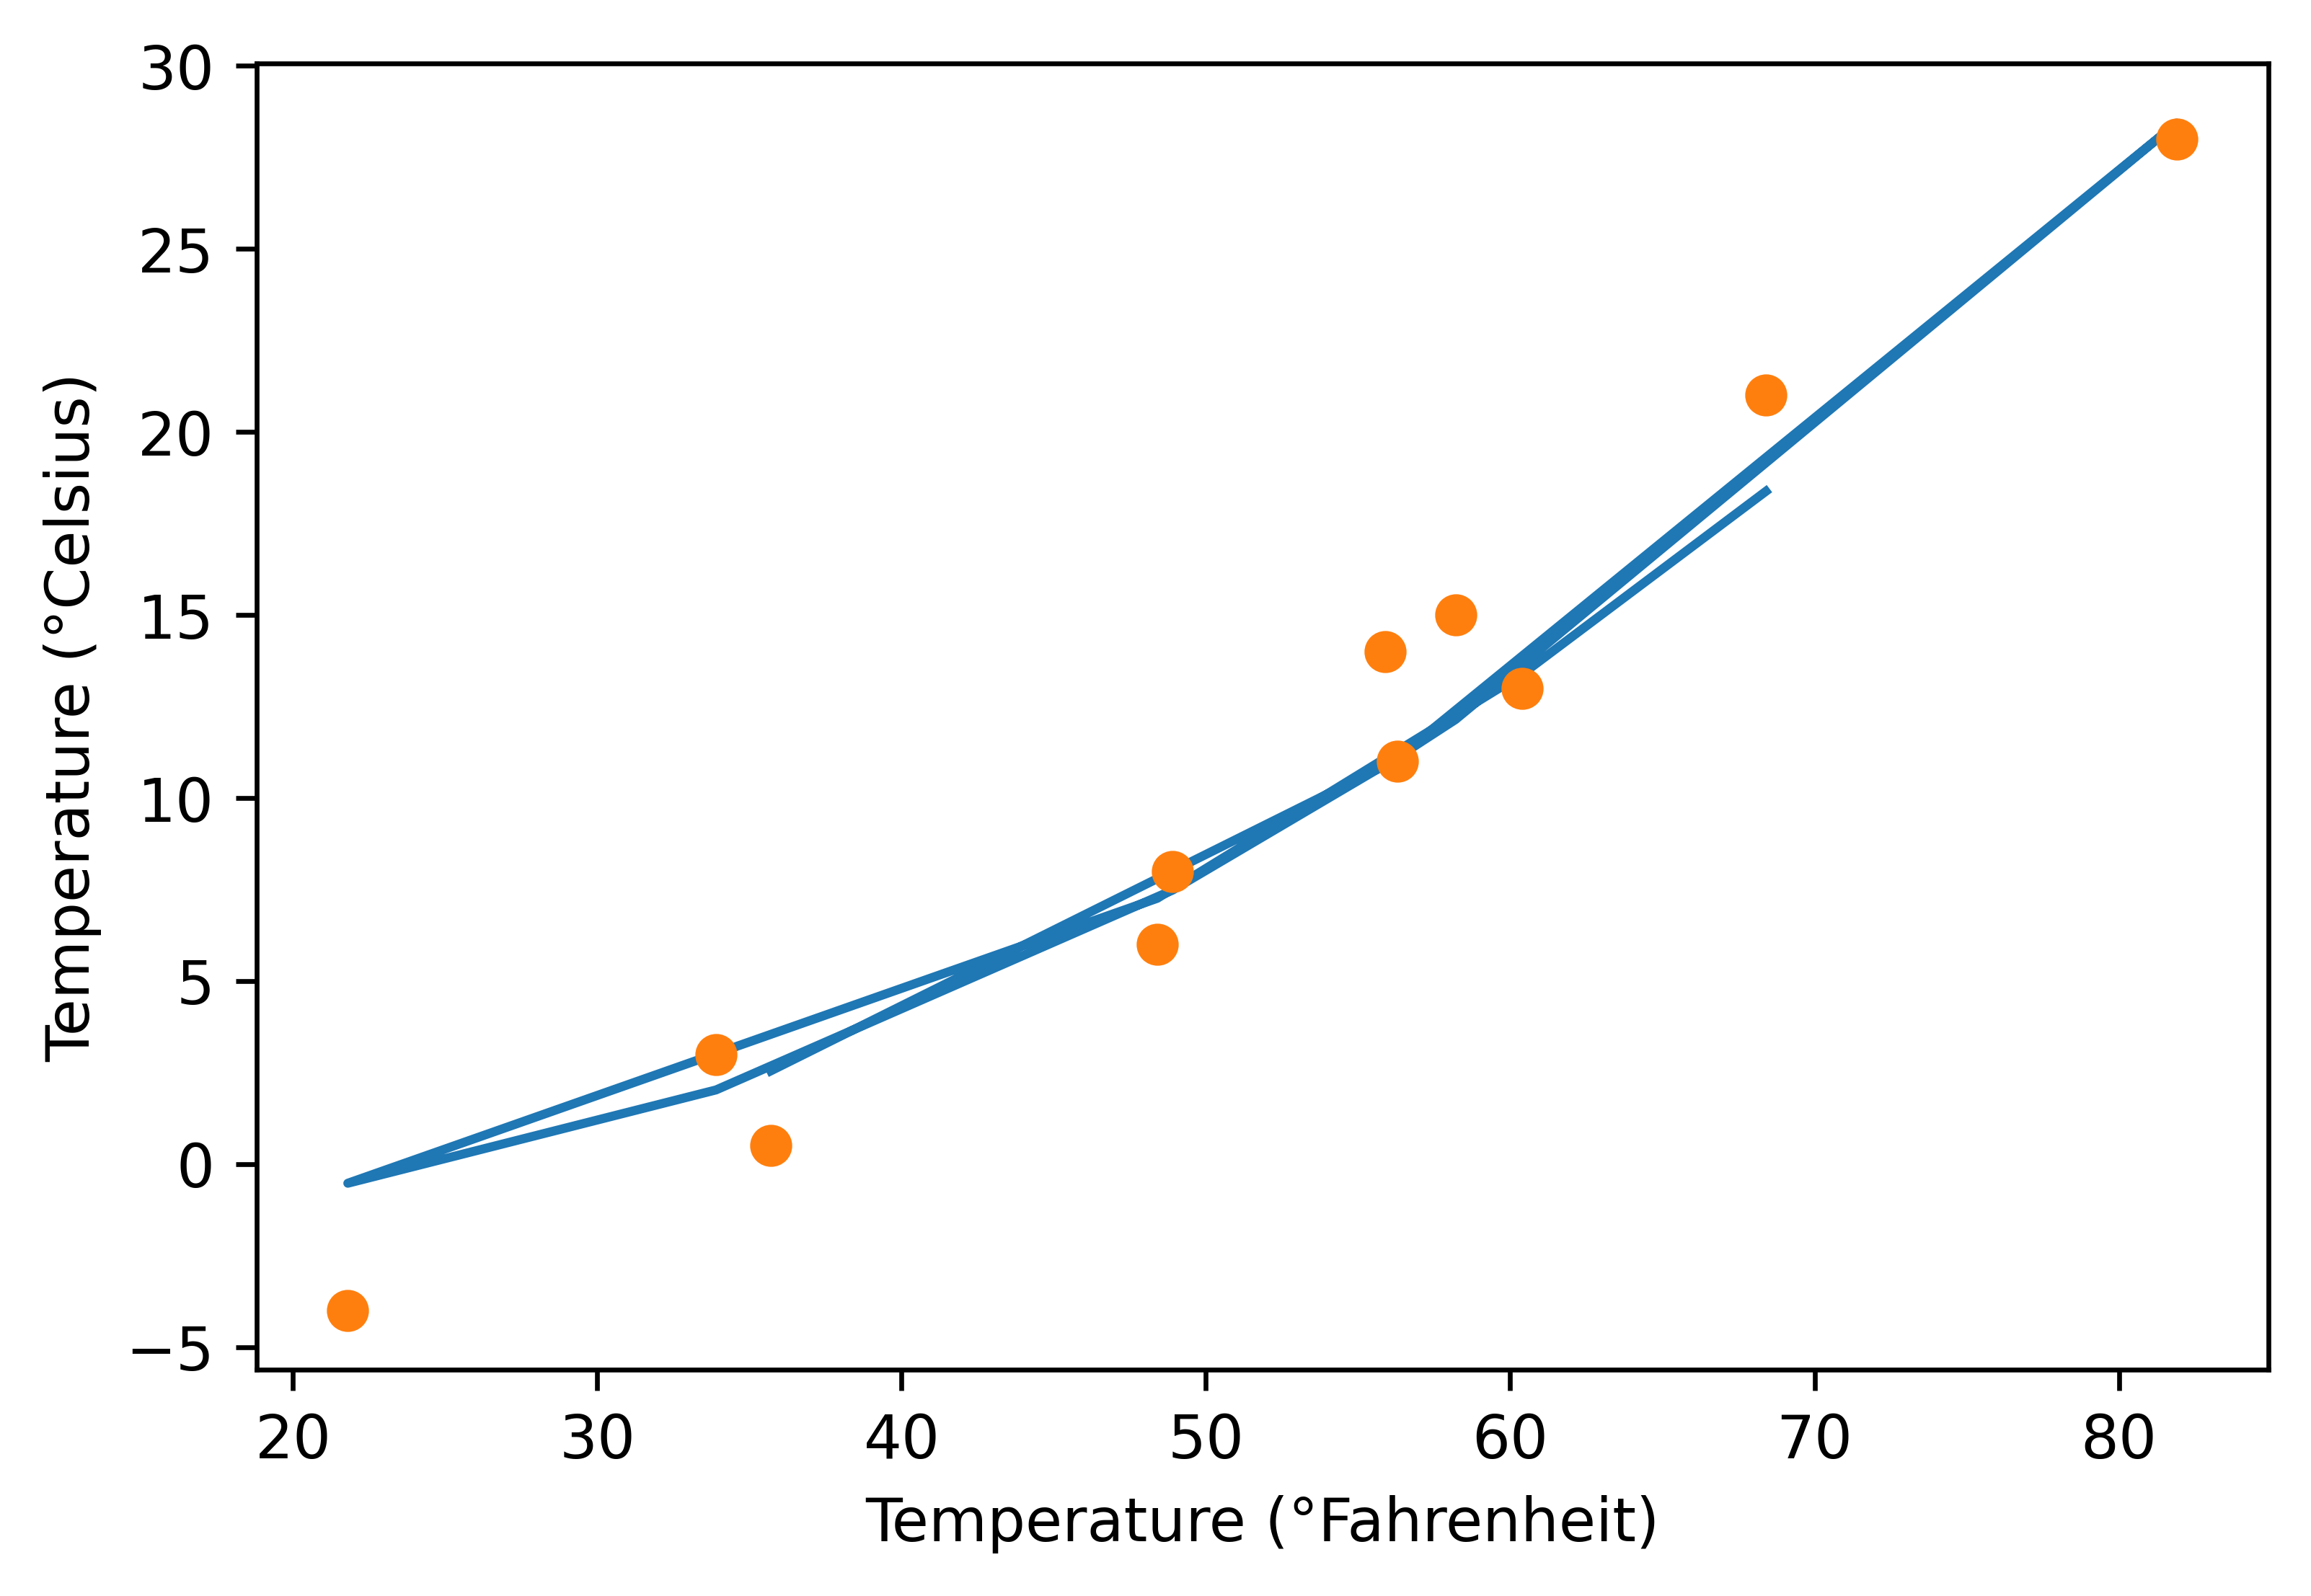

In [21]:
# Visualizing the predicted and actual values with learning rate 1e-4 as that has the least validation loss. 

%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params)  # <1>

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip

In [22]:
#Defining the training loop

def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
                  train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        with torch.no_grad(): # <1>
            val_t_p = model(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            assert val_loss.requires_grad == False # <2>
            
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

In [23]:
#Defining the loss

def calc_forward(t_u, t_c, is_train):
    with torch.set_grad_enabled(is_train):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
    return loss